<h1>1. ライブラリのインポート</h1>

In [30]:
# テキストマイニングで使うライブラリの数々
from gensim.models import word2vec
import re
import matplotlib as mplt
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from PIL import Image
import os
from tqdm import tqdm
from IPython.display import clear_output
import time
# こちらは pip を使用
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud, ImageColorGenerator

<h1>2. 関数の設定</h1>

In [31]:
# 記号かどうかを判別する関数
def find_kigou(string):
    for s in string:
        if s in ["!","?","[","]","(",")","「","」","！","？","（","）","'",'"',",","."]:
            return False
    return True

In [32]:
# 一文字だけの言葉を削除関数
def token(words,tokens,h):
    m = [chr(i) for i in range(12354,12354 + 82)]
    for token in tokens:
        word = token.surface
        hinsi = token.part_of_speech.split(',')[0]
        if hinsi == h:
            key = word
            if key not in words:
                if find_kigou(key):
                    # 一文字ひらがなの場合を削除
                    if len(key) == 1 and key not in m:
                        words[key] = 1
                    # 二文字ひらがなの場合を削除
                    if len(key) == 2 and (key[0] not in m and key[1] not in m):
                        words[key] = 1
                    # 三文字以上はすべて許可
                    if len(key) >= 3 :
                        words[key] = 1
            else:
                words[key] += 1
    return words

In [33]:
# 歌詞を読み込んで解析を行う関数
def kashi(kashi_path,n):
    #歌詞読み込み
    rdata = open(f"./データ/【歌詞】/{kashi_path}",'r',encoding="utf-8_sig")
    data = rdata.read().replace('\n', '')
    #形態素解析
    t = Tokenizer()
    tokens = t.tokenize(data)
    #名詞抽出
    words = {}
    words = token(words,tokens,"名詞")
    if len(words) <= 50:
        words = token(words,tokens,"形容詞")
    if len(words) <= 50:
        words = token(words,tokens,"副詞")
        
    #フォルダ作成        
    kyokumei = kashi_path.split(".")[0]
    os.mkdir(f"./データ/【画像】/{kyokumei}")
    #テキストマイニング＆保存
    for i in tqdm(range(n)):
        wordcloud = WordCloud(font_path="HGRGM.TTC",
                              regexp="[\w']+",
                              background_color='white',
                              colormap='jet',
                              width=800,
                              height=800)
        wordcloud.fit_words(words)
#         plt.imshow(wordcloud)
        plt.axis("off")
#         plt.show()
        wordcloud.to_file(f'./データ/【画像】/{kyokumei}/{i}.png')

In [34]:
# テキストマイニングのファイル内に歌詞名のファイルを作成してその中に作成↑
def make_txt_mining(n):
    count = 0
    kashi_list = os.listdir("./データ/【歌詞】")
    #for i in tqdm(range(len(kashi_list))):
    for i in range(len(kashi_list)):
        count += 1
        ka = kashi_list[i].split(".")[0]
        if not os.path.isdir(f"./データ/【画像】/{ka}"):
            kashi(kashi_list[i],n)
        if count < len(kashi_list):
            clear_output()

In [35]:
def kashi_mask(kashi_path,mask_path,n):
    #歌詞読み込み
    rdata = open(f"./データ/【歌詞】/{kashi_path}",'r',encoding="utf-8_sig")
    data = rdata.read().replace('\n', '')
    #マスク読み込み
    msk = np.array(Image.open(f"./データ/【mask】/{mask_path}"))
    #形態素解析
    t = Tokenizer()
    tokens = t.tokenize(data)
    #名詞抽出
    words = {}
    words = token(words,tokens,"名詞")
    if len(words) <= 30:
        words = token(words,tokens,"形容詞")
    if len(words) <= 30:
        words = token(words,tokens,"副詞")
    
    #フォルダ作成        
    kyokumei = kashi_path.split(".")[0]
    kyokumei_mask = kyokumei + "_mask"
    os.mkdir(f"./データ/【画像】/{kyokumei_mask}")
    maskname = mask_path.split(".")[0]
    #テキストマイニング＆保存
    for i in tqdm(range(n)):
        wordcloud = WordCloud(font_path="HGRGM.TTC",
                              font_step = 2, 
                              min_font_size = 1,
                              regexp="[\w']+",
                              #mode = "RGBA",
                              background_color = "aqua",#背景の色
                              mask=msk,
                              contour_width=5,#輪郭線の太さ
                              contour_color='yellow',#輪郭線の色
                              width=800,
                              height=800)
        wordcloud.fit_words(words)
        image_colors = ImageColorGenerator(msk)
        wordcloud.recolor(color_func=image_colors)        #文字の色にmaskの色を反映させる場合はこれ
        #plt.imshow(wordcloud,interpolation="bilinear")   #maskの色を考慮しない場合、上の行は消してこれ　
        plt.axis("off")
        #plt.show()
        wordcloud.to_file(f"./データ/【画像】/{kyokumei_mask}/{kyokumei}.png")

<h1>3. 関数呼び出し</h1>

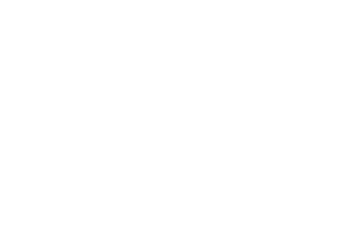

In [36]:
make_txt_mining(2)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.24s/it]


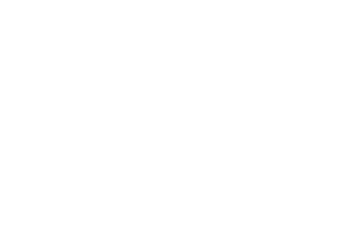

In [37]:
# 先ほど作成した関数を呼び出してあげる
kashi_mask("winey_zaim1.txt","money.jpg",1)